In [1]:
import cv2
import numpy as np
import torch
import os,glob
from PIL import Image
#bbox_grndtruth_snpepred_yolo.py
#yolo_prediction_coord.ipynb

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/kpangalu/Downloads/images_snpeout_iou_map_pur/300epochs_weights/weights/best.pt', force_reload=True) 

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\kpangalu/.cache\torch\hub\master.zip
YOLOv5  2023-3-22 Python-3.9.7 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [4]:
imgg1 = Image.open("/Users/kpangalu/Downloads/images_snpeout_iou_map_pur/d_images\s_S100_T100_frames_RYB_S100_T100_498_Crop_T_0_B_0_L_0_R_0.jpg")
imgg2 = Image.open("/Users/kpangalu/Downloads/images_snpeout_iou_map_pur/d_images\s_S100_T100_frames_RYB_S100_T100_519_Crop_T_0_B_0_L_0_R_0.jpg")
# Inference
imggs = [imgg1, imgg2]
results = model(imggs, size=640)  # includes NMS
# Results
results.print()  

image 1/2: 720x1600 1 gunroi_left, 1 gunroi_right, 1 bullet_left, 1 bullet_right
image 2/2: 720x1600 1 gunroi_left, 1 gunroi_right, 1 bullet_left, 1 bullet_right
Speed: 24.4ms pre-process, 125.0ms inference, 0.5ms NMS per image at shape (2, 3, 288, 640)


In [5]:
results.xyxy[0]  # im1 predictions (tensor)
results.pandas().xyxy[0]  # im1 predictions (pandas)

xmin        ymin         xmax        ymax  confidence  class  \
0  1336.475952  471.481842  1480.022705  608.132141    0.991412      3   
1    24.145994  313.237946   136.298599  421.785248    0.987034      2   
2   640.403870  587.077271   800.121155  651.792725    0.983059      0   
3   784.526367  586.968506   942.961548  651.221985    0.980979      1   

           name  
0  bullet_right  
1   bullet_left  
2   gunroi_left  
3  gunroi_right

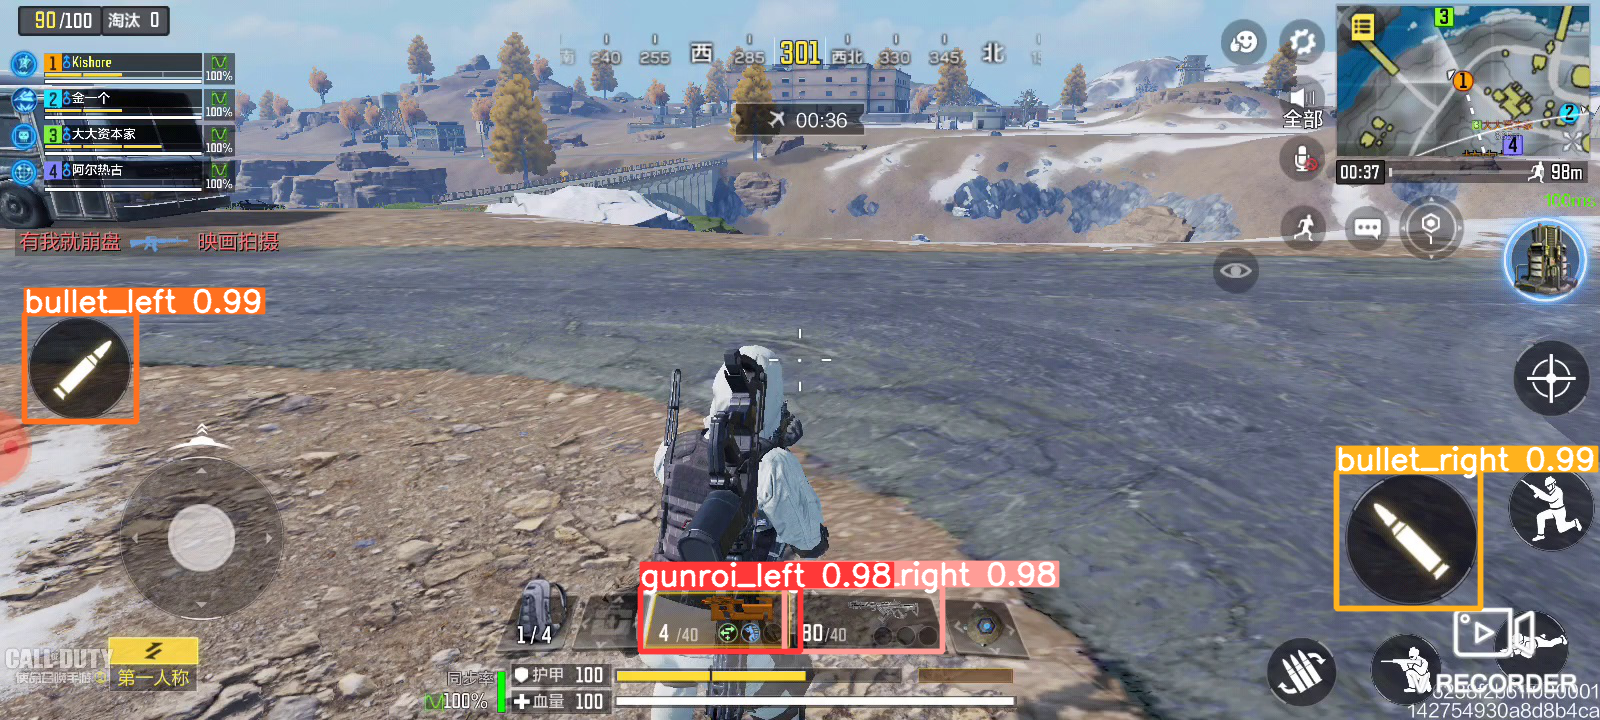

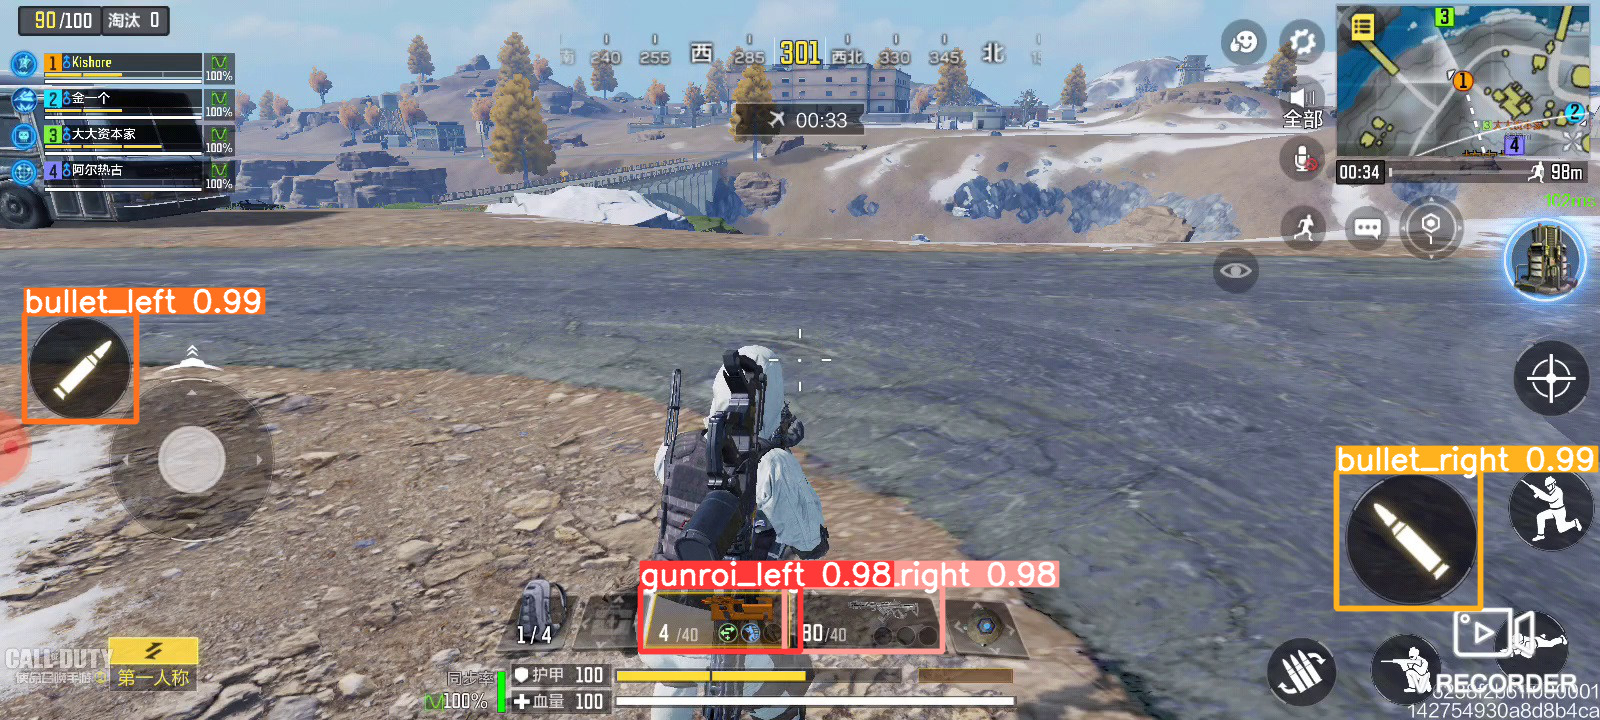

In [27]:
results.show()

In [28]:
print(results)

image 1/2: 720x1600 1 gunroi_left, 1 gunroi_right, 1 bullet_left, 1 bullet_right
image 2/2: 720x1600 1 gunroi_left, 1 gunroi_right, 1 bullet_left, 1 bullet_right
Speed: 24.4ms pre-process, 125.0ms inference, 0.5ms NMS per image at shape (2, 3, 288, 640)


In [8]:
# results.pandas().xyxy[1].to_csv('file1.csv')

In [9]:
results.xyxy[0]
# results.pandas().xyxy[1]

tensor([[1.33648e+03, 4.71482e+02, 1.48002e+03, 6.08132e+02, 9.91412e-01, 3.00000e+00],
        [2.41460e+01, 3.13238e+02, 1.36299e+02, 4.21785e+02, 9.87034e-01, 2.00000e+00],
        [6.40404e+02, 5.87077e+02, 8.00121e+02, 6.51793e+02, 9.83059e-01, 0.00000e+00],
        [7.84526e+02, 5.86969e+02, 9.42962e+02, 6.51222e+02, 9.80979e-01, 1.00000e+00]])

In [10]:
results.pandas().xyxy[0]

xmin        ymin         xmax        ymax  confidence  class  \
0  1336.475952  471.481842  1480.022705  608.132141    0.991412      3   
1    24.145994  313.237946   136.298599  421.785248    0.987034      2   
2   640.403870  587.077271   800.121155  651.792725    0.983059      0   
3   784.526367  586.968506   942.961548  651.221985    0.980979      1   

           name  
0  bullet_right  
1   bullet_left  
2   gunroi_left  
3  gunroi_right

In [11]:
for i in range(2):
    df = results.pandas().xyxy[i]
    print(df)
    

          xmin        ymin         xmax        ymax  confidence  class  \
0  1336.475952  471.481842  1480.022705  608.132141    0.991412      3   
1    24.145994  313.237946   136.298599  421.785248    0.987034      2   
2   640.403870  587.077271   800.121155  651.792725    0.983059      0   
3   784.526367  586.968506   942.961548  651.221985    0.980979      1   

           name  
0  bullet_right  
1   bullet_left  
2   gunroi_left  
3  gunroi_right  
          xmin        ymin         xmax        ymax  confidence  class  \
0  1336.480713  471.474518  1480.017944  608.106934    0.991503      3   
1    24.070063  313.301270   136.383514  421.707642    0.986080      2   
2   640.433350  586.989868   800.068665  651.677063    0.982957      0   
3   784.130249  586.855713   942.996033  651.268250    0.981166      1   

           name  
0  bullet_right  
1   bullet_left  
2   gunroi_left  
3  gunroi_right  


In [12]:
data = results.xyxy[0]
data

tensor([[1.33648e+03, 4.71482e+02, 1.48002e+03, 6.08132e+02, 9.91412e-01, 3.00000e+00],
        [2.41460e+01, 3.13238e+02, 1.36299e+02, 4.21785e+02, 9.87034e-01, 2.00000e+00],
        [6.40404e+02, 5.87077e+02, 8.00121e+02, 6.51793e+02, 9.83059e-01, 0.00000e+00],
        [7.84526e+02, 5.86969e+02, 9.42962e+02, 6.51222e+02, 9.80979e-01, 1.00000e+00]])

In [20]:
import numpy as np
data = results.xyxy[0]
# data.tolist()
# np.savetxt('/Users/kpangalu/Downloads/my_file.txt', torch.Tensor(data).numpy(),fmt='%7.2f')
np.savetxt('/Users/kpangalu/Downloads/my_file.txt', torch.Tensor(data).numpy(),fmt='%4d%5d%5d%5d%5.2f%3d')

In [22]:
"""
  Convert the lines of a file to a list
"""
def file_lines_to_list(path):
    # open txt file lines to a list
    with open(path) as f:
        content = f.readlines()
    # remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content]
    return content

In [23]:
#check bbox_grndtruth_snpepred_yolo.py
txt_file1 = "/Users/kpangalu/Downloads/my_file.txt"
lines_list1 = file_lines_to_list(txt_file1)
print(lines_list1)

['1336  471 1480  608 0.99  3', '24  313  136  421 0.99  2', '640  587  800  651 0.98  0', '784  586  942  651 0.98  1']
